<a href="https://colab.research.google.com/github/olgatar999/DataAnalysis-St/blob/main/Copy_of_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Data with Python with Matt Harrison


This is some text here

In [ ]:
print ('hello')


## Load the data

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster, decomposition, pipeline, preprocessing


In [ ]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
auto = pd.read_csv(url)

/tmp/ipython-input-590951226.py:2: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  auto = pd.read_csv(url)


In [ ]:
auto

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
41139  14.982273         0.0        0.0        0.0      19      0.0        0   
41140  14.330870         0.0        0.0        0.0      20      0.0        0   
41141  15.695714         0.0        0.0        0.0      18      0.0        0   
41142  15.695714         0.0        0.0        0.0      18      0.0        0   
41143  18.311667         0.0        0.0        0.0      16      0.0        0   

       cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
...         ...     ...    ...  ...      ...       ...         ...        ...   
41139       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
41140       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
41141       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
41142       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
41143       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                          createdOn                    modifiedOn  startStop  \
0      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
...                             ...                           ...        ...   
41139  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
41140  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
41141  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
41142  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
41143  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

       phevCity  phevHwy  phevComb  
0             0        0         0  
1             0        0         0  
2             0        0         0  
3             0        0         0  
4             0        0         0  
...         ...      ...       ...  
41139         0        0         0  
41140         0        0         0  
41141         0        0         0  
41142         0        0         0  
41143         0        0         0  

[41144 rows x 83 columns]

## Exploring Columns

In [ ]:
auto.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [ ]:
(auto
 .isna ()

.mean()
 *100
 )

barrels08      0.000000
barrelsA08     0.000000
charge120      0.000000
charge240      0.000000
city08         0.000000
                ...    
modifiedOn     0.000000
startStop     77.056193
phevCity       0.000000
phevHwy        0.000000
phevComb       0.000000
Length: 83, dtype: float64

In [ ]:
# missing data
((auto
  .isna()
  .mean()
  * 100
 )
  .pipe(lambda ser : ser[ser > 0])
)

cylinders      0.500681
displ          0.495820
drive          2.889850
eng_dscr      39.259673
trany          0.026735
guzzler       94.110927
trans_dscr    63.428446
tCharger      83.297686
sCharger      97.958390
atvType       91.347463
fuelType2     96.096636
rangeA        96.108789
evMotor       97.929224
mfrCode       74.902780
c240Dscr      99.803130
c240bDscr     99.807991
startStop     77.056193
dtype: float64

In [ ]:
auto.loc[auto.cylinders.isna(), ['make', 'model', 'year']]

make                             model  year
7138   Nissan                          Altra EV  2000
7139   Toyota                           RAV4 EV  2000
8143   Toyota                           RAV4 EV  2001
8144     Ford                             Th!nk  2001
8146     Ford            Explorer USPS Electric  2001
...       ...                               ...   ...
34563   Tesla            Model 3 Standard Range  2019
34564   Tesla       Model 3 Standard Range Plus  2019
34565   Tesla                Model S Long Range  2019
34566   Tesla  Model S Performance (19" Wheels)  2019
34567   Tesla  Model S Performance (21" Wheels)  2019

[206 rows x 3 columns]

In [ ]:
# Just look at categorical columns
auto.select_dtypes(include=[object])#.dtypes

drive    eng_dscr fuelType         fuelType1  \
0                Rear-Wheel Drive       (FFS)  Regular  Regular Gasoline   
1                Rear-Wheel Drive   (GUZZLER)  Regular  Regular Gasoline   
2               Front-Wheel Drive       (FFS)  Regular  Regular Gasoline   
3                Rear-Wheel Drive         NaN  Regular  Regular Gasoline   
4      4-Wheel or All-Wheel Drive  (FFS,TRBO)  Premium  Premium Gasoline   
...                           ...         ...      ...               ...   
41139           Front-Wheel Drive       (FFS)  Regular  Regular Gasoline   
41140           Front-Wheel Drive       (FFS)  Regular  Regular Gasoline   
41141  4-Wheel or All-Wheel Drive       (FFS)  Regular  Regular Gasoline   
41142  4-Wheel or All-Wheel Drive       (FFS)  Regular  Regular Gasoline   
41143  4-Wheel or All-Wheel Drive  (FFS,TRBO)  Premium  Premium Gasoline   

             make                model mpgData            trany  \
0      Alfa Romeo   Spider Veloce 2000       Y     Manual 5-spd   
1         Ferrari           Testarossa       N     Manual 5-spd   
2           Dodge              Charger       Y     Manual 5-spd   
3           Dodge  B150/B250 Wagon 2WD       N  Automatic 3-spd   
4          Subaru     Legacy AWD Turbo       N     Manual 5-spd   
...           ...                  ...     ...              ...   
41139      Subaru               Legacy       N  Automatic 4-spd   
41140      Subaru               Legacy       N     Manual 5-spd   
41141      Subaru           Legacy AWD       Y  Automatic 4-spd   
41142      Subaru           Legacy AWD       Y     Manual 5-spd   
41143      Subaru     Legacy AWD Turbo       N  Automatic 4-spd   

                VClass guzzler  ... atvType fuelType2 rangeA evMotor mfrCode  \
0          Two Seaters     NaN  ...     NaN       NaN    NaN     NaN     NaN   
1          Two Seaters       T  ...     NaN       NaN    NaN     NaN     NaN   
2      Subcompact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   
3                 Vans     NaN  ...     NaN       NaN    NaN     NaN     NaN   
4         Compact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   
...                ...     ...  ...     ...       ...    ...     ...     ...   
41139     Compact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   
41140     Compact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   
41141     Compact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   
41142     Compact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   
41143     Compact Cars     NaN  ...     NaN       NaN    NaN     NaN     NaN   

      c240Dscr c240bDscr                     createdOn  \
0          NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
1          NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
2          NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
3          NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
4          NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
...        ...       ...                           ...   
41139      NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
41140      NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
41141      NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
41142      NaN       NaN  Tue Jan 01 00:00:00 EST 2013   
41143      NaN       NaN  Tue Jan 01 00:00:00 EST 2013   

                         modifiedOn startStop  
0      Tue Jan 01 00:00:00 EST 2013       NaN  
1      Tue Jan 01 00:00:00 EST 2013       NaN  
2      Tue Jan 01 00:00:00 EST 2013       NaN  
3      Tue Jan 01 00:00:00 EST 2013       NaN  
4      Tue Jan 01 00:00:00 EST 2013       NaN  
...                             ...       ...  
41139  Tue Jan 01 00:00:00 EST 2013       NaN  
41140  Tue Jan 01 00:00:00 EST 2013       NaN  
41141  Tue Jan 01 00:00:00 EST 2013       NaN  
41142  Tue Jan 01 00:00:00 EST 2013       NaN  
41143  Tue Jan 01 00:00:00 EST 2013       NaN  

[41144 rows x 23 columns]

In [ ]:
auto.drive.value_counts()

drive
Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: count, dtype: int64

In [ ]:
auto.drive.value_counts(dropna=False)

drive
Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: count, dtype: int64

In [ ]:
auto.fuelType2.value_counts()

fuelType2
E85            1444
Electricity     134
Natural Gas      20
Propane           8
Name: count, dtype: int64

In [ ]:
auto.VClass.value_counts()

VClass
Compact Cars                          5886
Subcompact Cars                       5155
Midsize Cars                          4858
Standard Pickup Trucks                2354
Large Cars                            2179
Sport Utility Vehicle - 4WD           2090
Two Seaters                           2076
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1605
Special Purpose Vehicles              1455
Minicompact Cars                      1383
Standard Pickup Trucks 2WD            1263
Vans                                  1141
Standard Pickup Trucks 4WD            1087
Small Sport Utility Vehicle 4WD        847
Special Purpose Vehicle 2WD            664
Standard Sport Utility Vehicle 4WD     663
Midsize-Large Station Wagons           656
Small Sport Utility Vehicle 2WD        595
Midsize Station Wagons                 544
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                468
Vans, Cargo Type                       438
Minivan - 2WD                          364
Vans, Passenger Type                   317
Special Purpose Vehicle 4WD            316
Standard Sport Utility Vehicle 2WD     262
Small Pickup Trucks 4WD                252
Minivan - 4WD                           50
Standard Pickup Trucks/2wd               4
Vans Passenger                           2
Special Purpose Vehicles/4wd             2
Special Purpose Vehicles/2wd             2
Special Purpose Vehicle                  1
Name: count, dtype: int64

In [ ]:
auto.atvType.value_counts()

atvType
FFV               1444
Diesel            1108
Hybrid             593
EV                 203
Plug-in Hybrid     134
CNG                 50
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: count, dtype: int64

In [ ]:
auto.make.value_counts()

make
Chevrolet                           4003
Ford                                3371
Dodge                               2583
GMC                                 2494
Toyota                              2071
                                    ... 
RUF Automobile                         1
General Motors                         1
Environmental Rsch and Devp Corp       1
Goldacre                               1
Isis Imports Ltd                       1
Name: count, Length: 136, dtype: int64

## Visualizations

In [ ]:
auto.make.value_counts()#.plot.bar()

make
Chevrolet                           4003
Ford                                3371
Dodge                               2583
GMC                                 2494
Toyota                              2071
                                    ... 
RUF Automobile                         1
General Motors                         1
Environmental Rsch and Devp Corp       1
Goldacre                               1
Isis Imports Ltd                       1
Name: count, Length: 136, dtype: int64

<Axes: xlabel='make'>

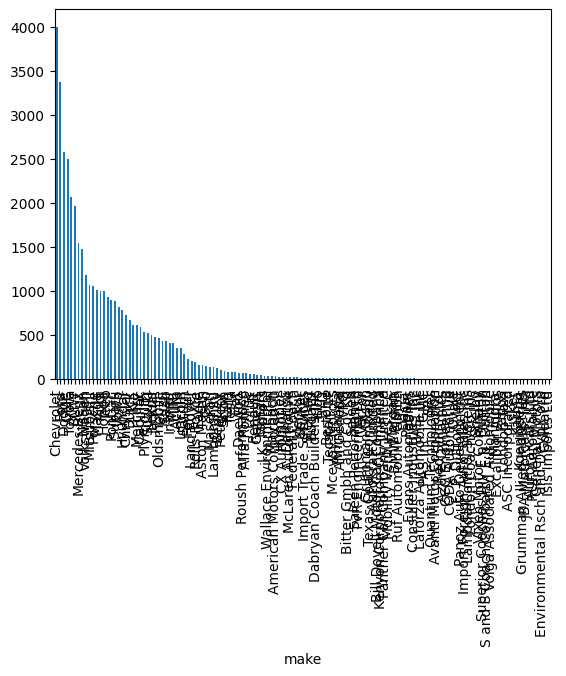

In [ ]:
(auto
.make
.value_counts()
.plot.bar()
)

<Axes: ylabel='make'>

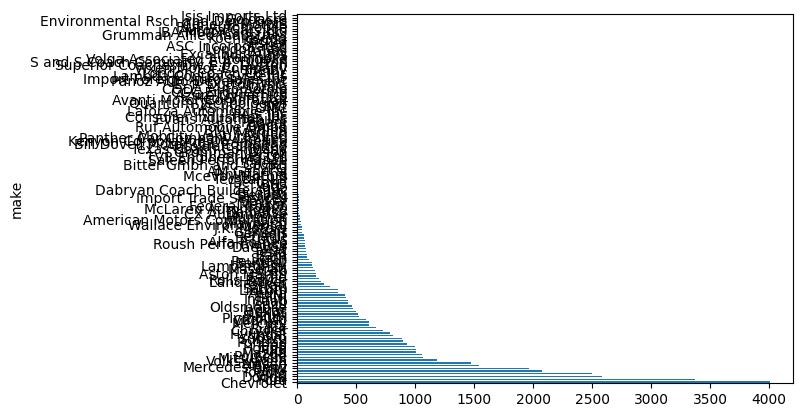

In [ ]:
(auto
.make
.value_counts()
.plot.barh()

)

<Axes: ylabel='make'>

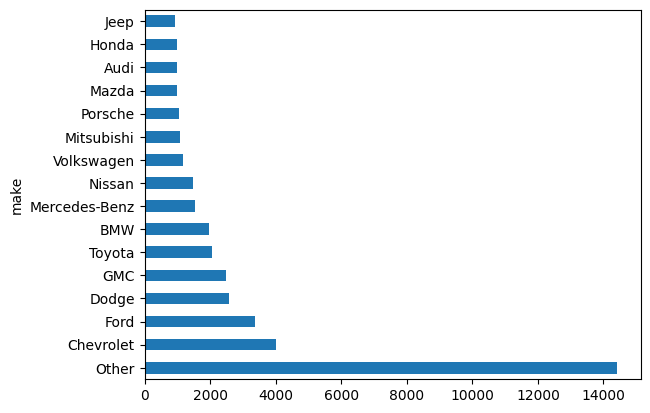

In [ ]:
# limit amounts
make_counts = auto.make.value_counts()
limit = 15
(auto
.make
 .where(auto.make.isin(make_counts.index[:limit]), 'Other')
.value_counts()
.plot.barh()
)

## Summary Stats

In [ ]:
# get summary stats
auto.describe() .loc [:, ['cylinders']]

cylinders
count  40938.000000
mean       5.717084
std        1.755517
min        2.000000
25%        4.000000
50%        6.000000
75%        6.000000
max       16.000000

from matplotlib import pyplot as plt
_df_0['cylinders'].plot(kind='hist', bins=20, title='cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cylinders'].plot(kind='line', figsize=(8, 4), title='cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='cylinders', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# inspect a single column
auto.city08.describe()

count    41144.000000
mean        18.369045
std          7.905886
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

<Axes: >

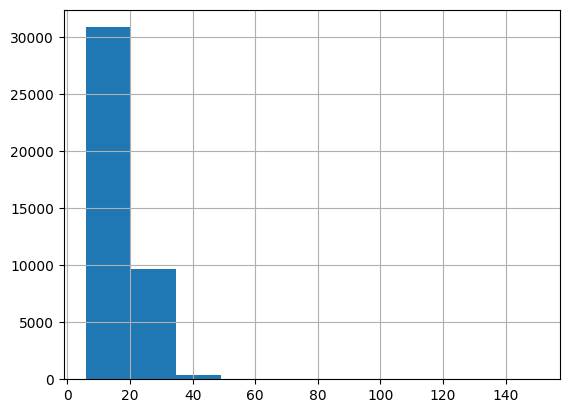

In [ ]:
auto.city08.hist()

<Axes: >

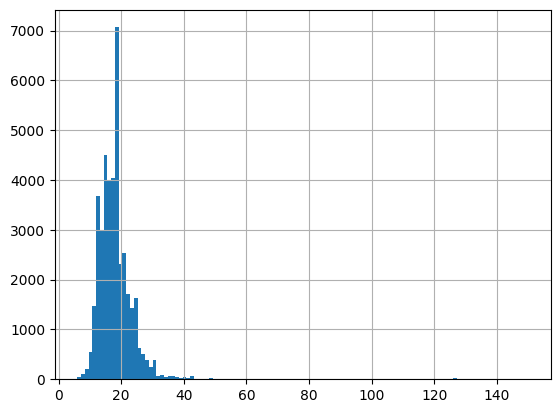

In [ ]:
# change number of bins
auto.city08.hist(bins=120)

In [ ]:
auto.city08.quantile([.1, .2, .3, .99])

0.10    13.0
0.20    14.0
0.30    15.0
0.99    40.0
Name: city08, dtype: float64

In [ ]:

# quantile cut - put in 10 buckets (deciles)
(auto
  .assign(bin=pd.qcut(auto.city08, 10))
 .groupby('bin', observed=True)
  .size()
 # .plot.barh()
)

bin
(5.999, 13.0]    6019
(13.0, 14.0]     2969
(14.0, 15.0]     4503
(15.0, 16.0]     3975
(16.0, 17.0]     4035
(17.0, 18.0]     4053
(18.0, 20.0]     5318
(20.0, 21.0]     2532
(21.0, 24.0]     4036
(24.0, 150.0]    3704
dtype: int64

<Axes: ylabel='bin'>

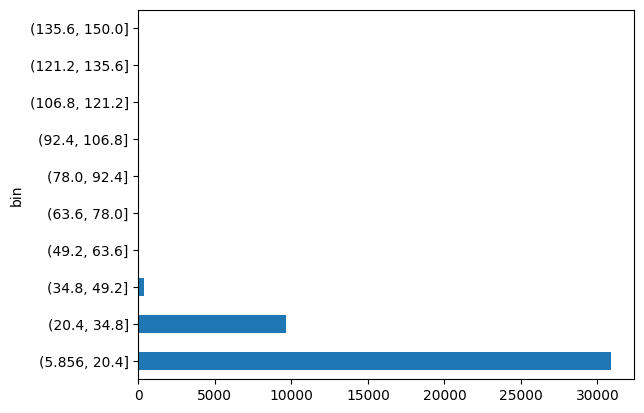

In [ ]:
# cut - 10 equal width bins (histogram does this)
(auto
  .assign(bin=pd.cut(auto.city08, 10))
  .groupby('bin', observed=True)
  .size()
  .plot.barh()
)

<Axes: ylabel='bin'>

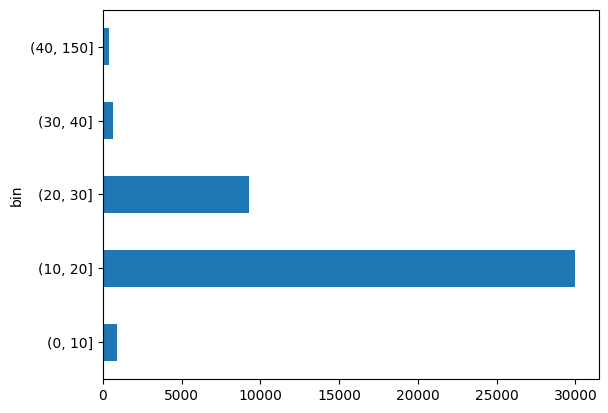

In [ ]:
# specify your own cut points
(auto
  .assign(bin=pd.cut(auto.city08, [0, 10, 20, 30, 40, 150]))
  .groupby('bin', observed=True)
  .size()
  .plot.barh()
)

## Relationships and Correlations

In [ ]:
# relationships
# continuous vs continuous
auto.city08.corr(auto.highway08)

In [ ]:
auto.plot.scatter(x='city08', y='highway08', alpha=.1)

In [ ]:
auto.plot.scatter(x='city08', y='highway08', alpha=.1, c='make')

In [ ]:
fig, ax = plt.subplots()
def get_color(make):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    return colors[hash(make) % len(colors)]
(auto
.groupby('make')
.apply(lambda df : df.plot.scatter(x='city08', y='highway08', alpha=1, ax=ax, c=get_color(df.name), label=df.name))
)
ax.legend()

In [ ]:
plt.rcParams['axes.prop_cycle'].by_key()['color'][len(seen)]

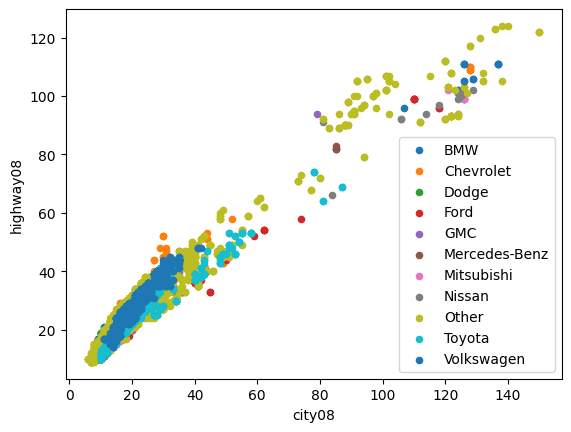

In [ ]:
fig, ax = plt.subplots()
n = 10
top_n_makes = auto.make.value_counts().index[:n]
seen = {}

def get_color(make):
    if make in seen:
        return seen[make]
    else:
        try:
            color = plt.rcParams['axes.prop_cycle'].by_key()['color'][len(seen) % 10]
        except IndexError:
            print(f'ERR {len(seen)}: {make} {seen=}')
        seen[make] = color
        return color

(auto
.assign(make=lambda df : df.make.where(df.make.isin(top_n_makes), 'Other'))
.groupby('make')
.apply(lambda df : df.plot.scatter(x='city08', y='highway08', alpha=1, ax=ax, c=get_color(df.name), label=df.name),  include_groups=False)
)
ax.legend()

<Axes: xlabel='city08', ylabel='highway08'>

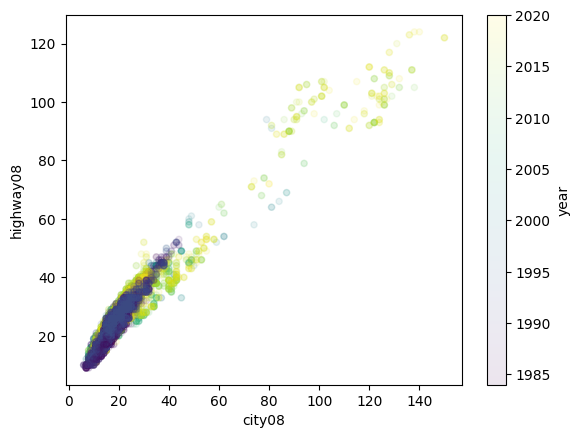

In [ ]:
auto.plot.scatter(x='city08', y='highway08', alpha=.1, c='year', cmap='viridis')

## Line Plots

In [ ]:
# time - avg mpg over years for 4 makes
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year', 'make'])
  ['city08']
  .mean()
  .unstack()
)
ax

make        BMW       Ford       Tesla     Toyota
year                                             
1984  17.625000  15.432203         NaN  22.402597
1985  16.923077  16.505376         NaN  21.868852
1986  16.181818  16.891667         NaN  20.017544
1987  15.153846  15.852174         NaN  20.031250
1988  14.526316  15.690909         NaN  19.633803
1989  14.272727  15.411215         NaN  19.212121
1990  14.933333  14.911504         NaN  18.741379
1991  14.516129  15.313725         NaN  18.224138
1992  14.277778  15.677083         NaN  17.862069
1993  14.875000  15.810526         NaN  17.169492
1994  15.846154  15.811765         NaN  18.122449
1995  16.076923  15.701149         NaN  18.435484
1996  17.823529  15.576471         NaN  19.145455
1997  17.903226  15.518072         NaN  18.759259
1998  17.142857  14.947368         NaN  18.818182
1999  16.675676  15.734177         NaN  19.600000
2000  16.000000  16.712500         NaN  19.709091
2001  16.058824  16.872340         NaN  20.037736
2002  16.260870  15.875000         NaN  20.313725
2003  16.450980  15.868132         NaN  20.431034
2004  16.375000  15.691358         NaN  19.267857
2005  16.186441  16.250000         NaN  19.660377
2006  15.968254  16.460317         NaN  19.127660
2007  16.092308  16.531250         NaN  19.520000
2008  16.064935  16.351852         NaN  19.163265
2009  16.121622  17.000000         NaN  19.140351
2010  15.963855  18.071429         NaN  19.421053
2011  18.178571  17.825000         NaN  19.457627
2012  17.270588  20.089744   88.000000  22.559322
2013  18.090000  20.710843   91.666667  23.152542
2014  21.061224  20.827586   89.333333  23.844828
2015  20.826446  22.350649   92.375000  23.433962
2016  21.107143  21.465909   92.944444  24.220000
2017  22.219048  20.848485   96.266667  24.779661
2018  22.600000  20.345455  105.090909  25.200000
2019  22.520833  19.742268  110.266667  26.269841
2020  20.265306  21.888889         NaN  31.636364

<Axes: xlabel='year'>

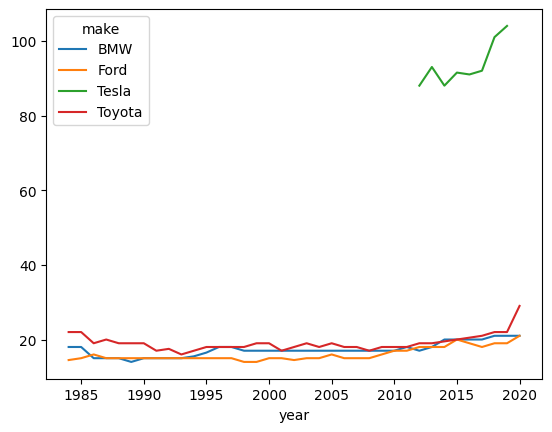

In [ ]:
# time - avg mpg over years
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year', 'make'])
  ['city08']
  .median()
  .unstack()
  .plot()
)
ax

(0.0, 35.0)

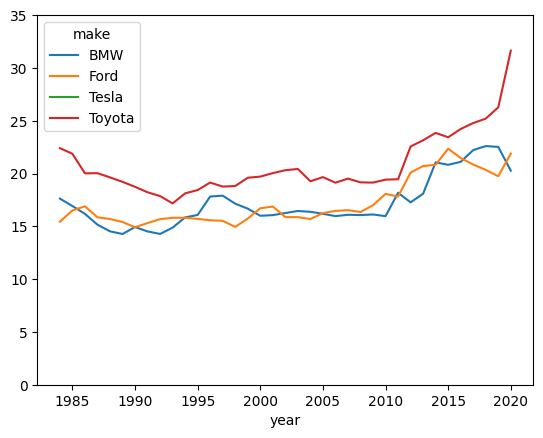

In [ ]:
# Change y-axis
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year', 'make'])
  ['city08']
  .mean()
  .unstack()
  .plot()
)
ax.set_ylim(0, 35)

## Plotting Style

Use the Economist style:
https://twitter.com/ECONdailycharts/status/1513619997943386112

# Trying to create Economist style plot
https://twitter.com/ECONdailycharts/status/1513619997943386112

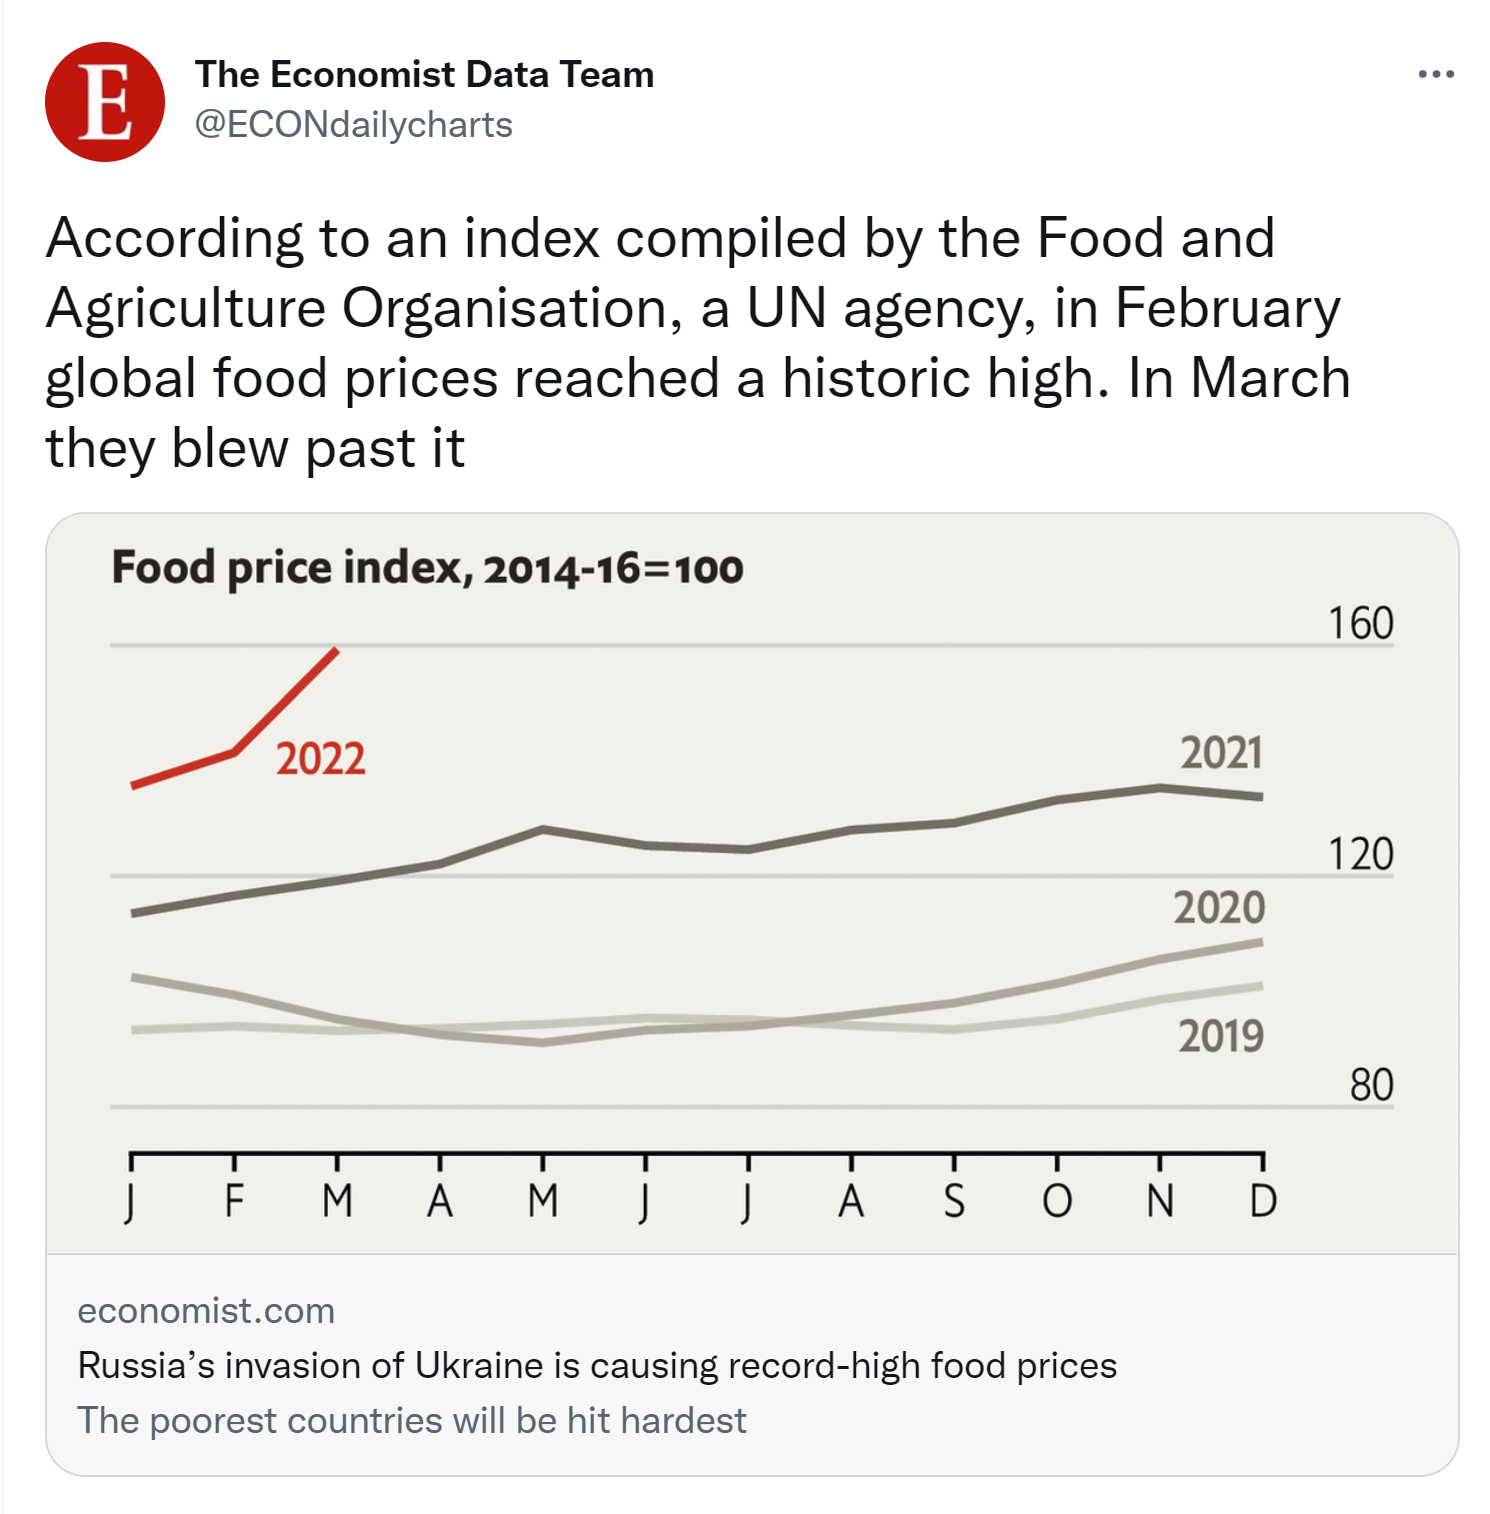

In [ ]:
# run two cells below if you don't have the Roboto font (and don't want warnings)

In [ ]:
!wget 'https://github.com/google/fonts/raw/refs/heads/main/ofl/roboto/Roboto%5Bwdth,wght%5D.ttf'

In [ ]:

from matplotlib import font_manager as fm, pyplot as plt

# Pick up any fonts in the current directory.
# If you do end up downloading the fonts to /usr/share/fonts/truetype,
# change this to: fm.findSystemFonts()
font_files = fm.findSystemFonts('.')

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Roboto')

/tmp/ipython-input-2800716113.py:5: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  autos = pd.read_csv(url)


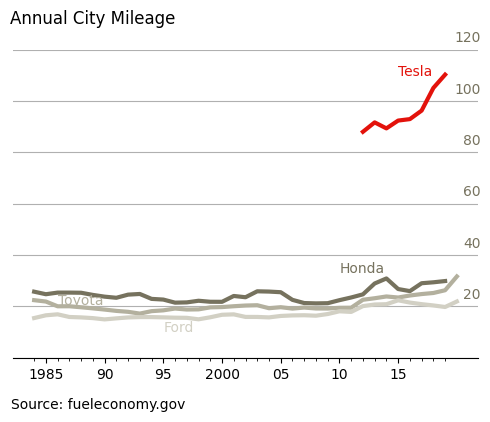

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
autos = pd.read_csv(url)

makes = ['Tesla', 'Honda', 'Toyota', 'Ford']
colors = ['#e3120b', '#76725e', '#b3b09e', '#d2d0c4']
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
ax = (autos
 .loc[autos.make.isin(makes)]
 .groupby(['year', 'make'])
 .city08
 .mean()
 .unstack()
 .loc[:, makes]
 .plot(color=colors, legend=False, linewidth=3, ax=ax)
)
plt.rcParams["font.family"] = "Roboto"
plt.grid(axis='y')
plt.suptitle('Annual City Mileage', ha='left', x=.12)
[ax.spines[side].set_visible(False) for side in ['top', 'left', 'right']]
ax.tick_params(left=False) # hide ticks
ax.set_xlabel('') # clear x label
ax.set_xticks(minor=True, ticks=range(1984,2020))
# set positions and labels for major ticks
ax.set_xticks(ticks=range(1985,2019,5))
ax.set_xticklabels(['1985', '90', '95', '2000', '05', '10', '15'])
ax.set_yticks(ticks=range(0,121,20))
ax.set_yticklabels([]) # hide left hand side
for label in range(20,121,20): # my own vertically shifted y-labels
    ax.text(2022, label+3, f'{label}', color=colors[-3], ha='right')
for label, pos, color in zip(makes, [(2015, 110), # label makes
                              (2010, 33),
                              (1986, 20.5),
                              (1995, 10),
                             ], colors):
    ax.text(*pos, label, color=color, ha='left')
_ = ax.text(1982, -20, 'Source: fueleconomy.gov', ha='left')


## More Line Plots

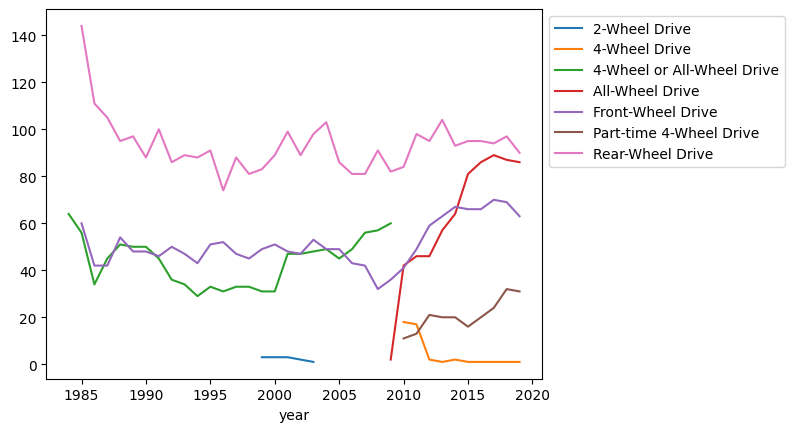

In [ ]:
# time - category counts over time
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year'])
  ['drive']
  .value_counts()
  .unstack()
  .iloc[:-1]
  .plot()
  .legend(bbox_to_anchor=(1,1))
)

(1984.0, 2019.0)

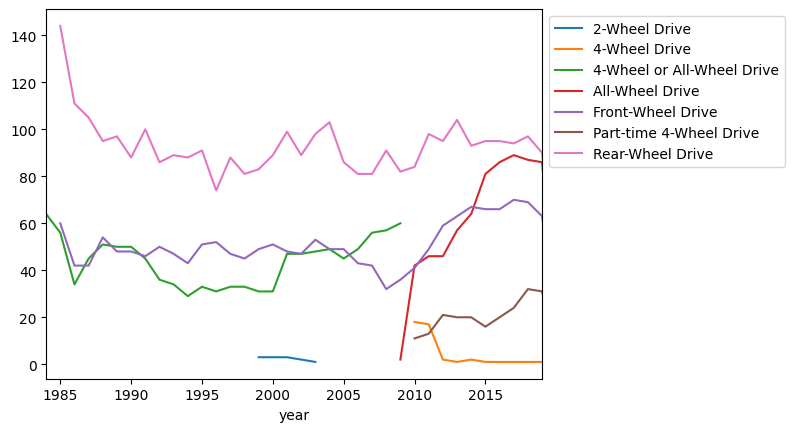

In [ ]:
# remove 2020 as it is missing data
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year'])
  ['drive']
  .value_counts()
  .unstack()
  .plot()

)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(1984, 2019)

(1984.0, 2019.0)

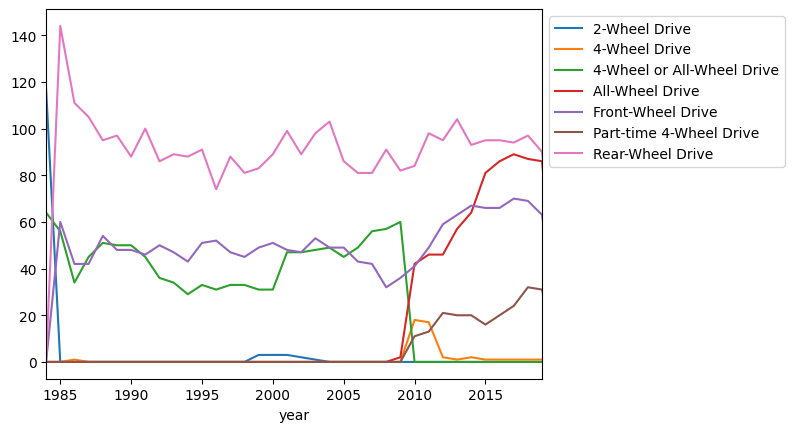

In [ ]:
# Crosstab version
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .plot()

)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(1984, 2019)

## Bar Plots

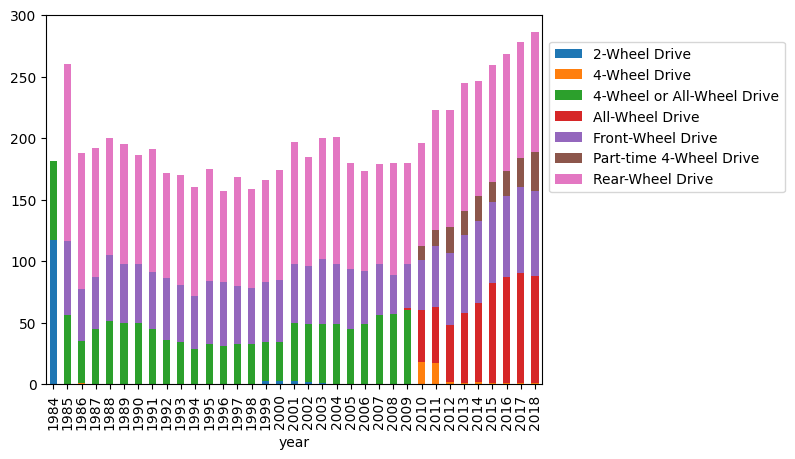

In [ ]:
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .plot.bar(stacked=True)
)
# bar plot uses 1 for each item, rather than value
ax.set_xlim(-.5, 2018-1984 + .5)
ax.legend(bbox_to_anchor=(1,.5))

(-0.5, 34.5)

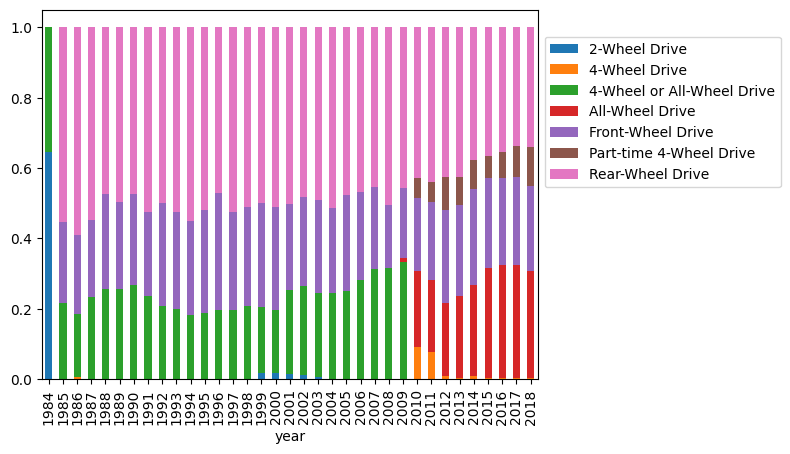

In [ ]:
# normalize
# remove 2020 as it is missing data
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .pipe(lambda df: df.div(df.sum(1), axis=0))
  .plot.bar(stacked=True)

)
ax.legend(bbox_to_anchor=(1,.5))
# bar plot uses 1 for each item, rather than value
ax.set_xlim(-.5, 2018-1984 + .5)

(0.0, 1.0)

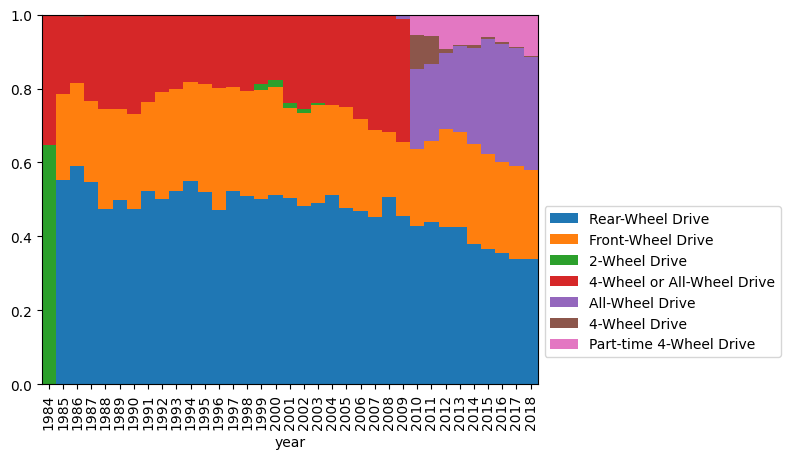

In [ ]:
# Adjust order using drives variable
drives = ['Rear-Wheel Drive', 'Front-Wheel Drive',
          '2-Wheel Drive',
          '4-Wheel or All-Wheel Drive',
          'All-Wheel Drive',
          '4-Wheel Drive',
          'Part-time 4-Wheel Drive', ]
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .pipe(lambda df: df.div(df.sum(1), axis=0))
  [drives]
  .plot.bar(stacked=True, width=1)
)
ax.legend(bbox_to_anchor=(1,.5))
# bar plot uses 1 for each item, rather than value
ax.set_xlim(-.5, 2018-1984 + .5)
ax.set_ylim(0, 1)

## Categorical vs Numeric

Text(0.5, 1.0, 'Avg City08')

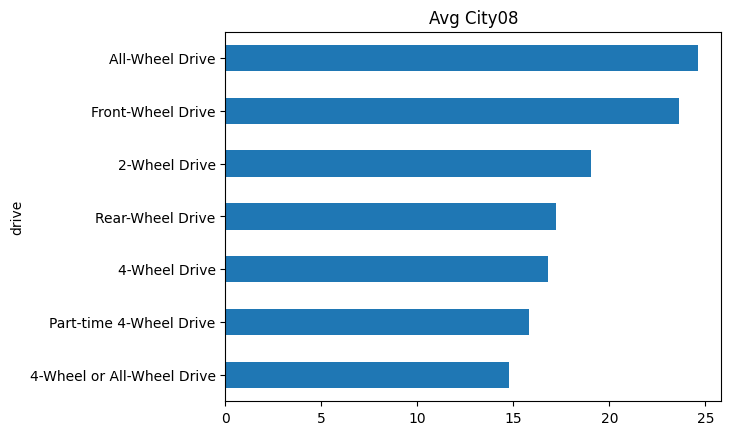

In [ ]:
# categorical vs numeric (although year is somewhat categorical)
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax =(auto
  [mask]
  .groupby(['drive'])
  ['city08']
  .mean()
  .sort_values()
  .plot.barh()
)
ax.set_title('Avg City08')

Text(0.5, 1.0, 'Avg City08')

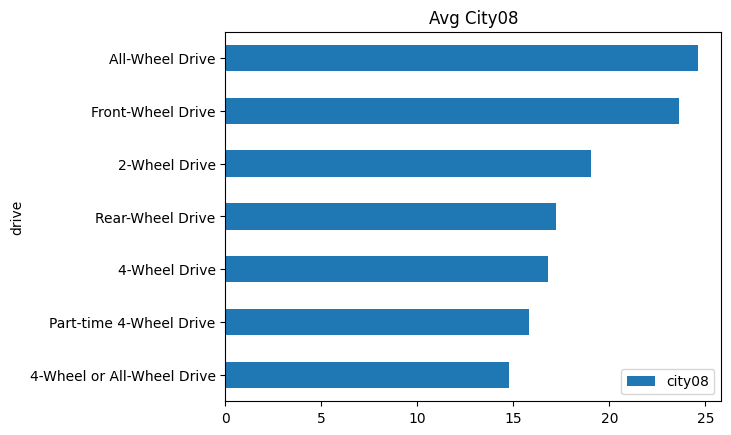

In [ ]:
# categorical vs numeric (although year is somewhat categorical)
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax =(auto
  [mask]
  .pipe(lambda df: pd.pivot_table(df, index='drive', values='city08', aggfunc='mean'))
  .sort_values(by='city08')
  .plot.barh()
)
ax.set_title('Avg City08')

## PCA

In [ ]:
# PCA
cols = ['charge120', 'city08', 'comb08', 'cylinders', 'drive', 'highway08', 'make',  'year', 'range', 'trany']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(auto[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [ ]:
X_pca

array([[ 4.01034041e-02, -1.11004770e+00,  1.03677536e+00, ...,
         1.08429624e-02,  1.08144526e-04,  0.00000000e+00],
       [-3.74183523e+00,  5.29893222e-01,  1.59928994e+00, ...,
        -7.03953759e-03, -3.62249380e-04,  0.00000000e+00],
       [ 1.61938867e+00, -2.18349162e+00, -8.35878731e-02, ...,
        -7.23983500e-03, -1.44979101e-03,  0.00000000e+00],
       ...,
       [-1.89620464e-01, -1.44852169e+00,  1.60040368e-01, ...,
        -1.25868553e-02, -5.37318639e-04,  0.00000000e+00],
       [ 1.98270178e-01, -1.63009251e+00, -2.65005364e-01, ...,
        -1.64188030e-02, -4.24046635e-04,  0.00000000e+00],
       [-6.35420360e-01, -1.47937783e+00,  7.55190057e-02, ...,
        -4.63511825e-03,  9.87245502e-05,  0.00000000e+00]])

In [ ]:
X_pca.shape

(41144, 184)

In [ ]:
pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1]+1)])

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.040103 -1.110048  1.036775 -0.103815 -0.484498  1.130538  0.193386   
1     -3.741835  0.529893  1.599290 -0.205221 -3.143712 -0.776884  0.677557   
2      1.619389 -2.183492 -0.083588  0.257539 -0.047501  0.482569  0.252826   
3     -2.923894 -1.241443  1.196387 -0.454656 -0.524067  0.193120  0.238052   
4     -0.024860 -1.644308 -0.310800 -0.368002  3.190777  1.565604  0.148512   
...         ...       ...       ...       ...       ...       ...       ...   
41139  0.815781 -1.664168 -0.529969 -0.160615  1.107714  0.231205  0.051275   
41140  1.426341 -1.829098 -0.916288  0.097286  1.526705  1.102962  0.331125   
41141 -0.189620 -1.448522  0.160040 -0.619217  2.744934  0.700177 -0.129322   
41142  0.198270 -1.630093 -0.265005 -0.365012  3.179075  1.569354  0.149058   
41143 -0.635420 -1.479378  0.075519 -0.625903  2.771787  0.693848 -0.131338   

            PC8       PC9      PC10  ...     PC175     PC176     PC177  \
0      1.768144 -0.152058  0.709264  ... -0.083126 -0.122876 -0.324194   
1      0.738010  4.474710  1.859452  ...  1.425386  0.191685  0.121526   
2      1.182338 -0.011415 -0.033256  ...  0.357709 -0.120847 -0.680828   
3      2.068860 -1.006183 -0.365122  ... -0.042277  0.565482  0.071103   
4     -0.809119  1.785426 -0.347062  ... -0.019632 -0.004867 -0.164748   
...         ...       ...       ...  ...       ...       ...       ...   
41139 -0.768256 -0.016339 -0.315770  ...  0.238260  0.025039 -0.365876   
41140  0.008068  1.020057 -0.293088  ...  0.237641  0.277951 -0.244607   
41141 -1.571927  0.748491 -0.368869  ... -0.000129 -0.087629 -0.308709   
41142 -0.804364  1.785957 -0.346534  ... -0.009782  0.084415 -0.170483   
41143 -1.585444  0.749030 -0.369744  ... -0.019013 -0.257779 -0.286016   

          PC178     PC179     PC180     PC181     PC182     PC183  PC184  
0      0.028888  0.200304 -0.052751 -0.022526  0.010843  0.000108    0.0  
1     -0.191308  0.125650  0.056071  0.034640 -0.007040 -0.000362    0.0  
2     -0.198549  0.213717  0.192300  0.035533 -0.007240 -0.001450    0.0  
3      0.096499  0.194834 -0.036988  0.024364 -0.010224  0.001601    0.0  
4      0.139765  0.028593  0.027429 -0.034273 -0.003206  0.000098    0.0  
...         ...       ...       ...       ...       ...       ...    ...  
41139  0.222117  0.013604 -0.085532  0.039243 -0.011670 -0.000045    0.0  
41140  0.212036  0.008352 -0.034181 -0.001952 -0.010241 -0.000045    0.0  
41141 -0.022088  0.053974  0.045875  0.074801 -0.012587 -0.000537    0.0  
41142  0.069621  0.040321  0.009026  0.071071 -0.016419 -0.000424    0.0  
41143  0.149846  0.033844 -0.023922  0.006922 -0.004635  0.000099    0.0  

[41144 rows x 184 columns]

In [ ]:
model.steps

[('std', StandardScaler()), ('pca', PCA(random_state=42))]

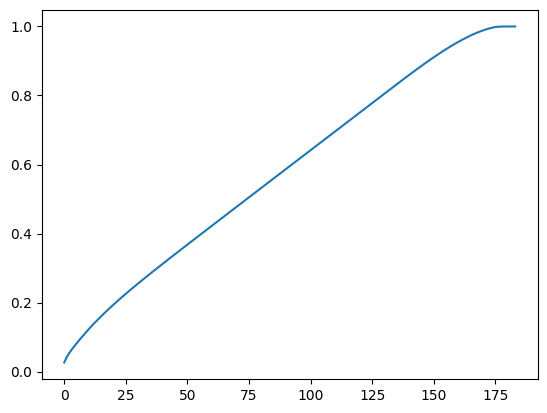

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i}' for i in range(1, pca.n_components_+1)])

charge120    city08    comb08  cylinders  highway08      year  \
PC1         -0.0  0.423665  0.434887  -0.321867   0.434495  0.112269   
PC2         -0.0  0.016652  0.024773   0.207305   0.043701  0.462218   
PC3          0.0  0.126486  0.094301   0.129221   0.040353 -0.201001   
PC4          0.0  0.000448  0.005698  -0.057351   0.011198  0.064165   
PC5          0.0 -0.006525 -0.018997  -0.058493  -0.045804 -0.051999   
...          ...       ...       ...        ...        ...       ...   
PC180       -0.0 -0.596784 -0.126676   0.014897   0.696471 -0.005671   
PC181        0.0 -0.494466  0.794814   0.007589  -0.303362 -0.001610   
PC182        0.0  0.138184 -0.125775   0.002463   0.016123  0.001357   
PC183       -0.0  0.003563 -0.003532  -0.000319  -0.000404  0.000108   
PC184        1.0  0.000000  0.000000   0.000000   0.000000  0.000000   

          range  drive_4-Wheel Drive  drive_4-Wheel or All-Wheel Drive  \
PC1    0.282351            -0.015401                         -0.111154   
PC2    0.083547             0.182185                         -0.108630   
PC3    0.424251             0.005032                          0.039494   
PC4   -0.127796             0.380995                         -0.067801   
PC5    0.120436             0.166284                          0.440572   
...         ...                  ...                               ...   
PC180  0.266111             0.027144                          0.060340   
PC181  0.024570            -0.001260                         -0.000569   
PC182  0.056586            -0.001377                         -0.002156   
PC183  0.000023            -0.000471                         -0.000975   
PC184  0.000000             0.000000                          0.000000   

       drive_All-Wheel Drive  ...  trany_Automatic 6-spd  \
PC1                 0.060609  ...              -0.014326   
PC2                 0.287639  ...               0.091251   
PC3                -0.171417  ...              -0.020063   
PC4                -0.256012  ...               0.052043   
PC5                 0.186451  ...              -0.054536   
...                      ...  ...                    ...   
PC180               0.022978  ...              -0.004950   
PC181               0.000430  ...               0.037874   
PC182              -0.002086  ...               0.206732   
PC183              -0.000633  ...               0.000593   
PC184               0.000000  ...               0.000000   

       trany_Automatic 7-spd  trany_Automatic 8-spd  trany_Automatic 9-spd  \
PC1                -0.024618              -0.014161               0.011208   
PC2                 0.150544               0.087996               0.076684   
PC3                 0.118096               0.015350               0.003441   
PC4                 0.424303               0.055270               0.220093   
PC5                 0.032698               0.016391               0.070270   
...                      ...                    ...                    ...   
PC180              -0.012072              -0.012656              -0.009098   
PC181               0.026624               0.020842               0.016058   
PC182               0.139432               0.108161               0.089113   
PC183               0.000388               0.000345               0.000271   
PC184               0.000000               0.000000               0.000000   

       trany_Manual 3-spd  trany_Manual 4-spd  trany_Manual 4-spd Doubled  \
PC1             -0.019557           -0.035719                    0.005414   
PC2             -0.012542           -0.097218                   -0.015387   
PC3              0.042196            0.108115                    0.005299   
PC4             -0.019399           -0.047277                    0.001252   
PC5             -0.010659            0.106461                    0.008238   
...                   ...                 ...                         ...   
PC180            0.013556            0.031681           

In [ ]:
# How original columns impact each component
(pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i}' for i in range(1, pca.n_components_+1)])
.loc[['PC1', 'PC2', 'PC3']]
# find columns with abs > .3
.loc[:, lambda df: (df.abs() > .3).any(axis='index')]
)

city08    comb08  cylinders  highway08      year     range  \
PC1  0.423665  0.434887  -0.321867   0.434495  0.112269  0.282351   
PC2  0.016652  0.024773   0.207305   0.043701  0.462218  0.083547   
PC3  0.126486  0.094301   0.129221   0.040353 -0.201001  0.424251   

     drive_Rear-Wheel Drive  make_Tesla  
PC1               -0.166269    0.222457  
PC2                0.145151    0.080416  
PC3                0.345184    0.399990

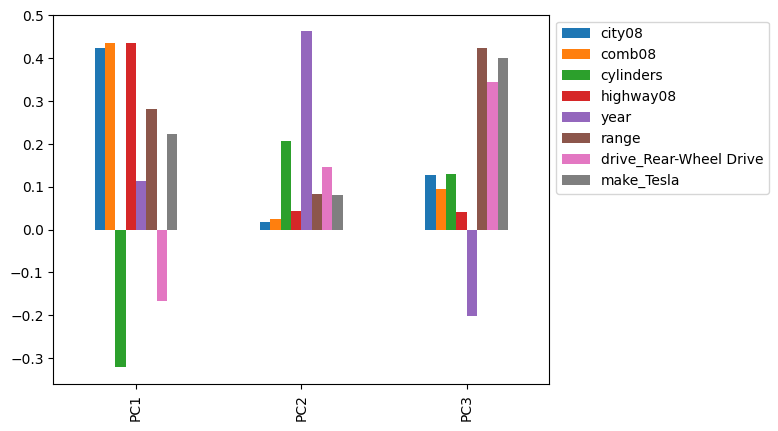

In [ ]:
# How original columns impact each component
(pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i}' for i in range(1, pca.n_components_+1)])
.loc[['PC1', 'PC2', 'PC3']]
# find columns with abs > .3
.loc[:, lambda df: (df.abs() > .3).any(axis='index')]
.plot.bar()
.legend(bbox_to_anchor=(1,1))
)

## Scatter Plot of PCA with Plotly

<Axes: xlabel='PC1', ylabel='PC2'>

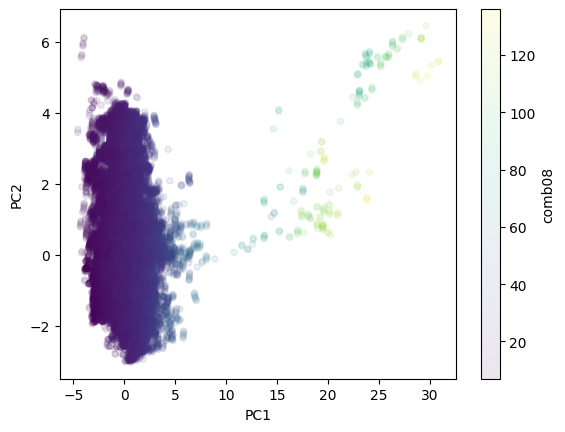

In [ ]:
(pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1]+1)])
.assign(**auto)
.plot.scatter(x='PC1', y='PC2', alpha=.1, c='comb08', cmap='viridis')
)

In [ ]:
import plotly.express as px
# sampling because it takes too long with 40,000 points
fig = px.scatter_3d(data:=pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1]+1)]).assign(**auto)
    .sample(2_000, random_state=42),
                x='PC1', y='PC2', z='PC3', color='comb08', hover_data=auto.columns,
                color_continuous_scale='viridis')
fig.update_layout(
    width=800,
    height=600,
    title='3D PCA Scatter Plot'
)
fig.update_traces(marker=dict(size=3))

fig.show()

## Clustering

In [ ]:
# Clustering

cols = ['charge120', 'city08', 'comb08', 'cylinders', 'drive', 'highway08', 'make',  'year', 'range', 'trany']
# standardize data
cmodel = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('cluster', cluster.KMeans(n_clusters=5, random_state=42))])
X = pd.get_dummies(auto[cols], drop_first=True).fillna(0)
cmodel.fit(X)

labels = cmodel.predict(X)

In [ ]:
(auto
.assign(cluster=labels)
.groupby('cluster')
.mean(numeric_only=True)
.style.background_gradient(cmap='RdBu', axis='index')
)

<Axes: xlabel='PC1', ylabel='PC2'>

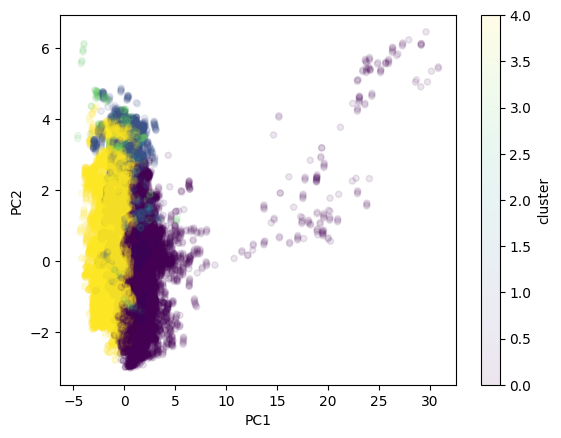

In [ ]:
(pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1]+1)])
.assign(**auto,
        cluster=labels)
.plot.scatter(x='PC1', y='PC2', alpha=.1, c='cluster', cmap='viridis')
)

In [ ]:
import plotly.express as px
# sampling because it takes too long with 40,000 points
fig = px.scatter_3d(data:=pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1]+1)]).assign(**auto,
        cluster=labels)
    .sample(2_000, random_state=42),
                x='PC1', y='PC2', z='PC3', color='cluster', hover_data=auto.columns,
                color_continuous_scale='viridis')
fig.update_layout(
    width=800,
    height=600,
    title='3D PCA Scatter Plot'
)
fig.update_traces(marker=dict(size=3))

fig.show()